In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import datetime as dt
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import missingno as msno

import warnings
warnings.simplefilter(action='ignore', category=Warning)

from IPython.display import Audio
sound_file = '/Users/soso/Downloads/bell.mp3'
sound_file_1 = '/Users/soso/Downloads/Batterie de blague.mp3.mp3'



In [2]:
mProduct = pd.read_csv('olist_7.csv')
mOrder = pd.read_csv('olist_6.csv')
mCard = pd.read_csv('olist_3.csv')
mReview = pd.read_csv('olist_5.csv')
mPayment = pd.read_csv('olist_4.csv')
mAdress = pd.read_csv('olist_2.csv')
mSeller = pd.read_csv('olist_8.csv')
mCustomer = pd.read_csv('olist_1.csv')

In [3]:
print("----Before-----", mCustomer.shape)
mAdressCust = mAdress.groupby('geolocation_zip_code_prefix').mean()
mAdressCust = mAdressCust.reset_index()
mAdressCust = mAdressCust.rename(columns={'geolocation_zip_code_prefix': "customer_zip_code_prefix"})
mAdressCust = mAdressCust.rename(columns={'geolocation_lat': "cust_geo_lat"})
mAdressCust = mAdressCust.rename(columns={'geolocation_lng': "cust_geo_lng"})
mCustomer = pd.merge(mCustomer, mAdressCust, on="customer_zip_code_prefix")
print("----After-----", mCustomer.shape)
mCustomer.head(5)

----Before----- (99441, 5)
----After----- (99163, 7)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,cust_geo_lat,cust_geo_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,-20.498489,-47.396929
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,-20.498489,-47.396929
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,-20.498489,-47.396929
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,-20.498489,-47.396929


In [4]:
mNewOne= mCustomer[["customer_id", "customer_unique_id"]]
mNewTwo = mOrder[["order_id","customer_id"]]
mNew = pd.merge(mNewOne, mNewTwo, on="customer_id", how="left")
mNew

,customer_id,customer_unique_id,order_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,95261f608a64bbbe760a212b4d48a4ee
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,9444fa2ab50a3f5af63b48be297eda24
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,dceb8e88274c6f42a88a76ed979eb817
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,6ee1cea1b2edcc713f83ebfbccbc57f9
...,...,...,...
99158,0b7a30ba373aeb55cf28add5b5477956,8c8173e547e020f411aa55b2fceed861,e12f5458c6b4f349a97fbf22e08d17ac
99159,ff6b440b2465bfaef05c675efb48cd15,e38a27b979a552e019e297ecc22dc67b,82a11e82ea02c7e3381366e935c1126e
99160,3f7029d9b98a47370cd5f3a97adcbccd,5894d202cc869b4ec460fce3c6ed8cb5,6e9f8d6156d8c37f0e0e6351908de639
99161,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,e65fa5f31ce4436d38bcf5e109fd43e4


In [5]:
print("mOrder------>", mOrder.shape ,"mOrder------>", mOrder.columns)
print("                    ")
print("mCustomer------>", mCustomer.shape ,"mCustomer------>", mCustomer.columns)
print("                    ")
print("mPayment------>", mPayment.shape ,"mPayment------>", mPayment.columns)
print("                    ")
print("mProduct------>", mProduct.shape ,"mProduct------>", mProduct.columns)
print("                    ")
print("mCard------>", mCard.shape ,"mCard------>", mCard.columns)
print("                    ")
#print("mAdressSel------>", mAdressSel.shape ,"mAdressSel------>", mAdressSel.columns)
print("                    ")
print("mAdressCust------>", mAdressCust.shape ,"mAdressCust------>", mAdressCust.columns)
print("                    ")
print("mSeller------>", mSeller.shape ,"mSeller------>", mSeller.columns)

print("                    ")
print("mAdress------>", mSeller.shape ,"mAdress------>", mAdress.columns)

print("                    ")
print("mAdress------>", mAdress.shape ,"mAdress------>", mAdress.columns)

print("                    ")
print("mAdress------>", mReview.shape ,"mAdress------>", mReview.columns)



mOrder------> (99441, 8) mOrder------> Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
                    
mCustomer------> (99163, 7) mCustomer------> Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'cust_geo_lat', 'cust_geo_lng'],
      dtype='object')
                    
mPayment------> (103886, 5) mPayment------> Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
                    
mProduct------> (32951, 9) mProduct------> Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='obje

# Jointure

In [6]:
mNewOne= mCustomer[["customer_id", "customer_unique_id"]]
mNewTwo = mOrder[["order_id","customer_id"]]
mNew = pd.merge(mNewOne, mNewTwo, on="customer_id", how="left")

# Frequence

In [7]:
mFreq = pd.merge(mOrder, mNew, on="customer_id", how="left")
mFreq.drop("order_id_y", inplace=True, axis=1)
mFreq.drop("order_estimated_delivery_date", inplace=True, axis=1)
mFreq.drop("order_delivered_customer_date", inplace=True, axis=1)
mFreq.drop("order_delivered_carrier_date", inplace=True, axis=1)
mFreq.drop("order_approved_at", inplace=True, axis=1)
mFreq.drop("order_purchase_timestamp", inplace=True, axis=1)
mFreq = pd.DataFrame(mFreq["customer_unique_id"].value_counts())
mFreq = mFreq.reset_index()
mFreq = mFreq.rename(columns={"index": 'customer_unique_id',"customer_unique_id": 'F_'})
mFreq.drop_duplicates(subset ="customer_unique_id",keep ="first", inplace = True)

# Recence

In [8]:
mNewOne= mCustomer[["customer_id", "customer_unique_id"]]
mNewTwo = mOrder[["order_id","customer_id"]]
mNew = pd.merge(mNewOne, mNewTwo, on="customer_id", how="left")
mOrderMonth = mOrder[["order_id","order_approved_at"]]
mOrderMonth = pd.merge(mNew, mOrderMonth, on="order_id")
mOrderMonth['Y_M_D'] = pd.to_datetime(mOrderMonth['order_approved_at'])
mOrderMonth.drop('customer_id', inplace=True, axis=1)
mOrderMonth.drop('order_id', inplace=True, axis=1)
mOrderMonth.drop('order_approved_at', inplace=True, axis=1)
mOrderMonth['Y_M_D'] = pd.to_datetime(mOrderMonth['Y_M_D'])
mOrderMonth["Epoch"] = (mOrderMonth['Y_M_D'] - dt.datetime(1970,1,1)).dt.total_seconds()
mOrderMonth = mOrderMonth.sort_values(by=['Epoch'], ascending=False)
mOrderMonth = mOrderMonth.dropna()
mOrderMonth.drop_duplicates(subset ="customer_unique_id",keep ="first", inplace = True)
mOrderMonth["Epoch_now"] = 1536019200
mOrderMonth["Epoch_diff"] = mOrderMonth["Epoch_now"] - mOrderMonth["Epoch"]
mOrderMonth["Epoch_diff_Min"] = mOrderMonth["Epoch_diff"]/60
mOrderMonth["Epoch_diff_hour"] = mOrderMonth["Epoch_diff_Min"]/60
mOrderMonth["Epoch_diff_day"] = mOrderMonth["Epoch_diff_hour"]/24
mOrderMonth["R_"]  = round(mOrderMonth["Epoch_diff_day"] )
mOrderMonth = mOrderMonth[["customer_unique_id","R_"]]
mRecency = mOrderMonth.copy()
mRecency

,customer_unique_id,R_
76301,ff22e30958c13ffe219db7d711e8f564,0.0
52724,24ac2b4327e25baf39f2119e4228976a,5.0
18256,b701bebbdf478f5500348f03aff62121,5.0
54450,5c58de6fb80e93396e2f35642666b693,5.0
8206,7febafa06d9d8f232a900a2937f04338,5.0
...,...,...
63317,88bc832f104b6dd684a17dbb1b76e778,700.0
13475,87776adb449c551e74c13fc34f036105,700.0
61746,b8b8726af116a5cfb35b0315ecef9172,700.0
32231,14359ea0c7a105749c0a56478825b015,700.0


# Montant

In [9]:
mTotal = pd.merge(mPayment, mNew, on="order_id", how="left")

mTotal.drop("order_id", inplace=True, axis=1)
mTotal.drop("payment_sequential", inplace=True, axis=1)
mTotal.drop("payment_installments", inplace=True, axis=1)
mTotal.drop("customer_id", inplace=True, axis=1)
mTotal.drop("payment_type", inplace=True, axis=1)
mTotal['M_'] = mTotal['payment_value'].groupby(mTotal['customer_unique_id']).transform('sum')
mTotal = mTotal.sort_values(by=['M_'], ascending=False)
mTotal.drop_duplicates(subset ="customer_unique_id",keep ="first", inplace = True)
mTotal = mTotal.dropna()
mTotal.drop("payment_value", inplace=True, axis=1)

# Create RFM DataFrame

In [10]:
import math

mRFM = pd.merge(mFreq, mTotal, on="customer_unique_id", how="left")
mRFM = pd.merge(mRFM, mRecency, on="customer_unique_id", how="left")

mRFM_v2 = mRFM.copy()
print(mRFM.quantile([ .33, .66], axis = 0))

       F_      M_     R_
0.33  1.0   74.94  153.0
0.66  1.0  149.76  293.0


In [11]:
_F = [
    (mRFM['F_'] <= 1),
    (mRFM['F_'] >= 2)]
f_v_ = [1,3]

mRFM['Freq_Sc_'] = np.select(_F, f_v_)

_M = [
    (mRFM['M_'] <= 75),
    (mRFM['M_'] > 75)  & (mRFM['M_'] < 150),
    (mRFM['M_'] >= 150)]

m_v_ = [1,2,3]

mRFM['Montant_Sc_'] = np.select(_M, m_v_)

_R = [
    (mRFM['R_'] <= 153),
    (mRFM['R_'] > 153)  & (mRFM['R_'] < 293),
    (mRFM['R_'] >= 293)]

r_v_ = [1,2,3]

mRFM['Recence_Sc_'] = np.select(_R, r_v_)

mRFM = mRFM[['Freq_Sc_','Montant_Sc_','Recence_Sc_']]

mRFM = pd.DataFrame(mRFM)

mRFM = mRFM.astype(str)

mRFM['Score'] = mRFM['Freq_Sc_'] + mRFM['Montant_Sc_'] + mRFM['Recence_Sc_']

mRFM['_R_'] = mRFM['Recence_Sc_']

In [12]:
mRFM

,Freq_Sc_,Montant_Sc_,Recence_Sc_,Score,_R_
0,3,3,1,331,1
1,3,3,2,332,2
2,3,3,2,332,2
3,3,3,1,331,1
4,3,3,1,331,1
...,...,...,...,...,...
95823,1,1,3,113,3
95824,1,2,3,123,3
95825,1,2,1,121,1
95826,1,1,1,111,1


In [13]:
mRFM.loc[mRFM. Score == "111", "Segmentation"] = "Les Nouveaux"
mRFM.loc[mRFM. Score == "112", "Segmentation"] = "Les Nouveaux"
mRFM.loc[mRFM. Score == "113", "Segmentation"] = "Les Perdus"
mRFM.loc[mRFM. Score == "121", "Segmentation"] = "Les Nouveaux"
mRFM.loc[mRFM. Score == "122", "Segmentation"] = "Les Perdus"
mRFM.loc[mRFM. Score == "123", "Segmentation"] = "Les Perdus"
mRFM.loc[mRFM. Score == "131", "Segmentation"] = "Les Nouveaux"
mRFM.loc[mRFM. Score == "132", "Segmentation"] = "Les Potentiels"
mRFM.loc[mRFM. Score == "133", "Segmentation"] = "Les Potentiels"
mRFM.loc[mRFM. Score == "211", "Segmentation"] = "Les Potentiels"
mRFM.loc[mRFM. Score == "212", "Segmentation"] = "Les Potentiels"
mRFM.loc[mRFM. Score == "213", "Segmentation"] = "Les Perdus"
mRFM.loc[mRFM. Score == "221", "Segmentation"] = "Les Potentiels"
mRFM.loc[mRFM. Score == "222", "Segmentation"] = "Les Potentiels"
mRFM.loc[mRFM. Score == "223", "Segmentation"] = "Les Potentiels"
mRFM.loc[mRFM. Score == "231", "Segmentation"] = "Les Potentiels"
mRFM.loc[mRFM. Score == "232", "Segmentation"] = "Les Potentiels"
mRFM.loc[mRFM. Score == "233", "Segmentation"] = "Les Potentiels"
mRFM.loc[mRFM. Score == "311", "Segmentation"] = "Les Potentiels"
mRFM.loc[mRFM. Score == "312", "Segmentation"] = "Les Perdus"
mRFM.loc[mRFM. Score == "313", "Segmentation"] = "Les Perdus"
mRFM.loc[mRFM. Score == "321", "Segmentation"] = "Les Trésors"
mRFM.loc[mRFM. Score == "322", "Segmentation"] = "Les Potentiels"
mRFM.loc[mRFM. Score == "323", "Segmentation"] = "Les Perdus"
mRFM.loc[mRFM. Score == "331", "Segmentation"] = "Les Trésors"
mRFM.loc[mRFM. Score == "332", "Segmentation"] = "Les Potentiels"
mRFM.loc[mRFM. Score == "333", "Segmentation"] = "Les Potentiels"

In [14]:
mRFM = mRFM["Segmentation"]
mRFM = pd.DataFrame(mRFM)
mRFM_value = mRFM.value_counts()
mRFM_value = pd.DataFrame(mRFM_value)
mRFM_value = mRFM_value.rename(columns={0: "NB_seg"})
mRFM_value["_seg"] = mRFM_value["NB_seg"]/95729*100

In [15]:
mRFM_value["_seg"] = round(mRFM_value["_seg"])
mRFM_value = mRFM_value.reset_index()
mRFM_value

,Segmentation,NB_seg,_seg
0,Les Nouveaux,41130,43.0
1,Les Perdus,31817,33.0
2,Les Potentiels,21737,23.0
3,Les Trésors,1045,1.0


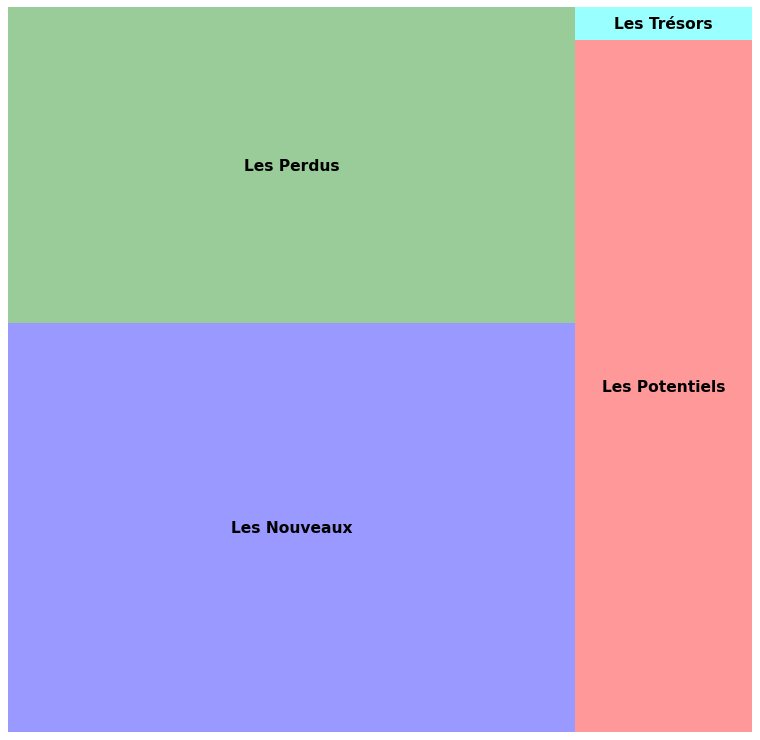

In [17]:
mRFM_value["_seg"] = round(mRFM_value["_seg"])
mRFM_value = mRFM_value.reset_index()
mRFM_value
# libraries
import matplotlib.pyplot as plt
import squarify
import pandas as pd
figure(figsize=(12, 12), dpi=80)


# plot it
squarify.plot(sizes=mRFM_value['NB_seg'], label=mRFM_value['Segmentation'], color=['blue','green','red','cyan','magenta','yellow'], alpha=.4 ,text_kwargs={'fontsize':14,'weight':'bold'})
#plt.rc('font', size=30)          # controls default text sizes
#plt.rc('axes', titlesize=30)     # fontsize of the axes title
#plt.rc('axes', labelsize=30)     # fontsize of the x and y labels
#plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
#plt.rc('legend', fontsize=30)    # legend fontsize
#plt.rc('figure', titlesize=30)   #  
plt.axis('off')


plt.show()